In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

# import specific sheet from excel
ads = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress')
dmg = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic')

# Join two tables
cus = pd.merge(ads,dmg,on='customer_id')

# Adjust gender column, replace Femal,Female with F and Male with M
cus = cus.replace({'Female':'F','Femal':'F','Male':'M'})
cus = cus.replace({'New South Wales':'NSW','Victoria':'VIC'})

In [2]:
cus.isna().sum() # Check NaN for each variable

customer_id                              0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [3]:
# Transformation
def age(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
    return age

# Create new column with customer ages
cus['age'] = cus['DOB'].apply(age)
# https://thispointer.com/pandas-apply-a-function-to-single-or-selected-columns-or-rows-in-dataframe/

# Specify null values
cus[(cus['tenure'].isnull()) & (cus['tenure'].isnull())]

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age
139,144,22 Oxford Junction,2315,NSW,Australia,3,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN,NaN
163,168,16 Golf View Center,3020,VIC,Australia,6,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN,NaN
262,267,48 Arizona Drive,2768,NSW,Australia,10,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN,NaN
285,290,6923 Tennessee Circle,2766,NSW,Australia,9,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN,NaN
446,451,8385 Lien Drive,3192,VIC,Australia,10,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN,NaN
448,453,37093 Manitowish Center,2170,NSW,Australia,10,Cornelius,Yarmouth,U,81,NaT,Assistant Professor,IT,High Net Worth,N,NaN,No,NaN,NaN
449,454,9 Monterey Point,4221,QLD,Australia,10,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,NaN,Yes,NaN,NaN
475,480,74011 Manufacturers Street,2320,NSW,Australia,6,Darelle,Ive,U,67,NaT,Registered Nurse,Health,Mass Customer,N,NaN,Yes,NaN,NaN
508,513,5723 Raven Drive,3126,VIC,Australia,12,Kienan,Soar,U,30,NaT,Tax Accountant,IT,Mass Customer,N,NaN,No,NaN,NaN
521,526,27230 7th Place,2068,NSW,Australia,12,Ardelle,NaN,U,9,NaT,Social Worker,Health,Mass Customer,N,NaN,Yes,NaN,NaN


In [4]:
# Add in new parameters
sub = cus[['customer_id','state','property_valuation','gender','past_3_years_bike_related_purchases',
           'deceased_indicator','owns_car','tenure','age']]
sub = sub.dropna()
sub['purchase'] = ['>=50' if x >= 50 else '<50' for x in sub['past_3_years_bike_related_purchases']]
sub['valuation'] = ['>6' if x > 6 else '<=6' for x in sub['property_valuation']]

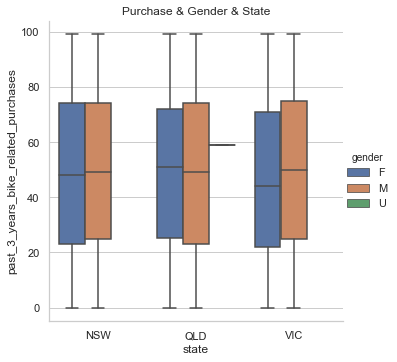

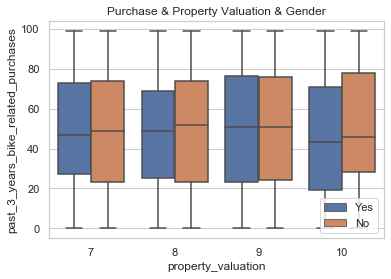

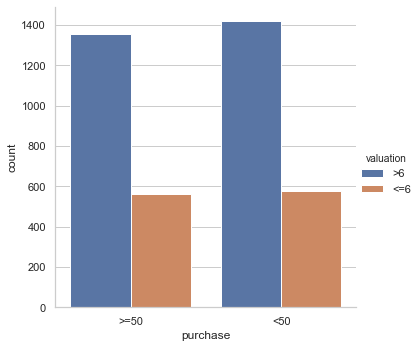

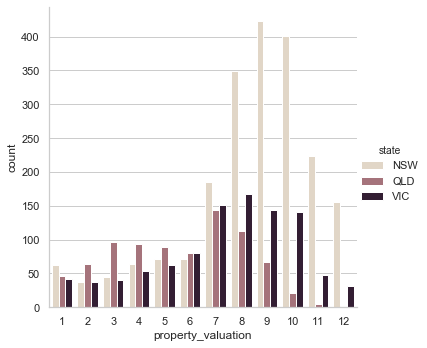

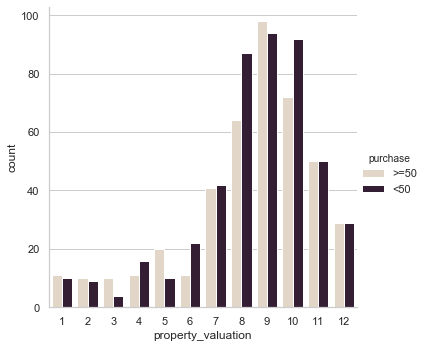

In [5]:
# Visualization
sns.set(style="whitegrid")
sns.catplot(x = 'state',y = 'past_3_years_bike_related_purchases',hue = 'gender',
            data = sub, kind="box")
plt.title('Purchase & Gender & State')
plt.show()

sns.boxplot(hue = 'owns_car',y = 'past_3_years_bike_related_purchases',x='property_valuation',
            data = sub[(sub['property_valuation'] >= 7) & (sub['property_valuation'] <= 10)])
plt.legend(loc = 'lower right')
plt.title('Purchase & Property Valuation & Gender')
plt.show()

sns.catplot(x = 'purchase',hue ='valuation', kind = 'count',data = sub)
plt.show()

sns.catplot(x='property_valuation', hue = 'state',kind="count", palette="ch:.25", data=sub)
plt.show()

sns.catplot(x='property_valuation', hue = 'purchase',kind="count", palette="ch:.25", 
            data=sub[(sub['age'] >= 30)& (sub['state'] == 'NSW') & (sub['owns_car'] == 'Yes')])
plt.show()


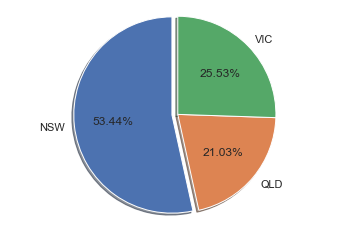

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NSW', 'QLD', 'VIC'
sizes = [2089, 822, 998]
explode = (0.06, 0, 0)  # only explode the 1st slice (i.e. 'NSW')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

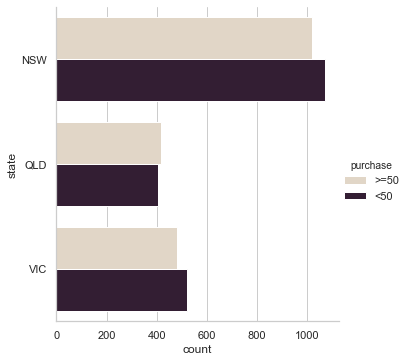

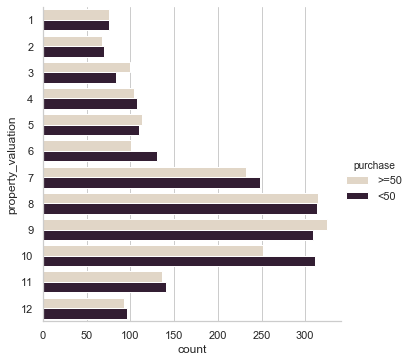

In [7]:
# Visualization
sns.catplot(hue='purchase', y = 'state',kind="count", palette="ch:.25", data=sub)
plt.show()
sns.catplot(hue='purchase', y = 'property_valuation',kind="count", palette="ch:.25", data=sub)
plt.show()

In [8]:
# Create new variable
tran = pd.read_excel(r'/Users/wenyizhang/Desktop/Ellen/MSMF/MSMF_summer/KPMG data analyst intern/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions')
tran['pay'] = tran['list_price'] + tran['standard_cost']
tran_new = tran.groupby(['customer_id']).sum()
data = pd.merge(sub,tran_new,on = 'customer_id')
data = data.drop(['transaction_id','product_id','pay','product_first_sold_date'],axis = 1)
data['lp'] = ['>mean' if x > 6328.718749 else '<=mean' for x in data['list_price']]
data['purchase'] = ['>=49' if x >= 49 else '<49' for x in data['past_3_years_bike_related_purchases']]

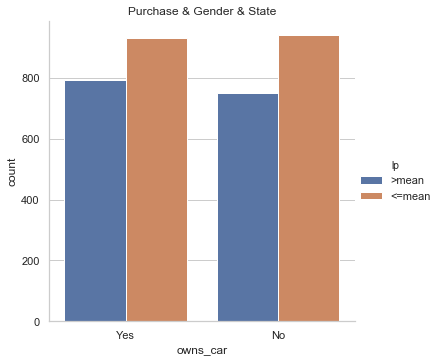

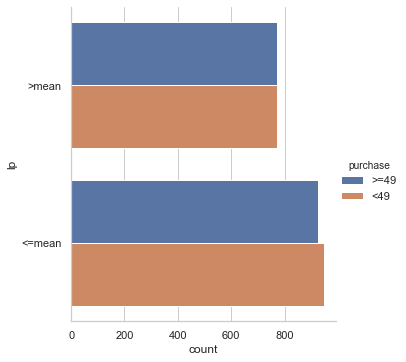

In [9]:
# Visualization
sns.set(style="whitegrid")
sns.catplot(x = 'owns_car',hue = 'lp',
            data = data, kind='count')
plt.title('Purchase & Gender & State')
plt.show()

sns.catplot(hue = 'purchase',y = 'lp',data = data,kind = 'count')
plt.show()

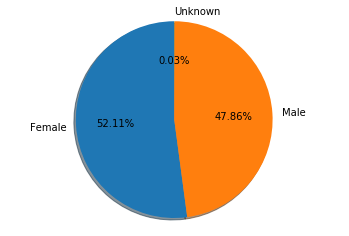

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male', 'Unknown'
sizes = [2037, 1871, 1]
explode = (0, 0, 0)  # only explode the 1st slice (i.e. 'NSW')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()